In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

In [2]:
# ÌïúÍ∏Ä Í∏ÄÍº¥Ï≤¥ Î≥ÄÍ≤Ω
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() Ïù¥Îü∞Í±∞ ÌñàÏùÑ Îïå, Ïª¨ÎüºÏù¥ ÏÉùÎûµÎêòÏßÄ ÏïäÍ≥†, Î™®Îì† Ïª¨Îüº Îú®Í≤å
pd.set_option('display.max_columns', None)
# ÏßÄÏàò ÌëúÍ∏∞Î≤ï ÎåÄÏã†Ïóê ÏÜåÏàòÏ†êÏúºÎ°ú ÌëúÏãúÌïòÎäîÏΩîÎìú
pd.options.display.float_format = '{:.2f}'.format
# Í∞í Í∏∏Ïù¥ Ï†úÌïú X
pd.set_option('display.max_colwidth', None) # Í∞í Í∏∏Ïù¥ Ï†úÌïú ÏóÜÏùå

AutoGluonÏùÑ ÏßÑÌñâÌïòÍ≥† ÎÇòÏÑú, Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî LightGBMÏù¥ Îõ∞Ïñ¥ÎÇú ÏÑ±Îä•Ïù¥ÎùºÎäî Ï†êÏùÑ ÌååÏïÖÌï®. <br><br>
AutoGluonÏóêÏÑú ÏÉùÍ∞ÅÌïú Feature ImportanceÎèÑ Î∞òÏòÅÌï¥ÏÑú Ïª¨Îüº ÏÑ†ÌÉù

#### üìä Í∞Å Î™®Îç∏Î≥Ñ Feature Importance ÎπÑÍµê

# Í∞Å Î™®Îç∏ Î≥Ñ Feature Importance

| Feature ÏàúÏúÑ | Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ) | Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä (Í∞ÄÏ§ëÏπò) | ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ (ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ) | XGBoost (ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ) | LightGBM (ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ) | LightGBM (Í∞ÄÏ§ëÏπò) | CatBoost (ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ) | AutoGloun |
|------|------------------------------------------|------------------------------|--------------------------------------|--------------------------------|--------------------------------|----------------------|--------------------------------|--------------------------------|
| 1    | VOC_STOP_CANCEL_MONTH1_YN            | VOC_STOP_CANCEL_MONTH1_YN   | TOTAL_USED_DAYS                      | VOC_STOP_CANCEL_MONTH1_YN   | AGMT_END_SEG                        | AGMT_END_SEG                       | AGMT_END_SEG                          | MONTHS_REMAINING  |                            
| 2    | CH_LAST_DAYS_BF_GRP                          | CH_LAST_DAYS_BF_GRP                 | CH_HH_AVG_MONTH1                  | CH_LAST_DAYS_BF_GRP                 | TOTAL_USED_DAYS                    | TOTAL_USED_DAYS                   | VOC_STOP_CANCEL_MONTH1_YN | TOTAL_USED_DAYS                   |
| 3    | AGMT_END_SEG                                    | AGMT_END_SEG                            | CH_25_RATIO_1MONTH                | VOC_TOTAL_MONTH1_YN              | AGE_GRP10                               | AGE_GRP10                               | CH_LAST_DAYS_BF_GRP               | CH_HH_AVG_MONTH1               |
| 4    | TV_I_CNT                                              | TV_I_CNT                                      | VOC_STOP_CANCEL_MONTH1_YN | BUNDLE_YN                                 | CH_HH_AVG_MONTH1                | CH_LAST_DAYS_BF_GRP             | TOTAL_USED_DAYS                     | INHOME_RATE                          |
| 5    | PAID_CHNL_CNT_GRP                            | PAID_CHNL_CNT_GRP                    | AGMT_END_SEG                          | AGMT_END_SEG                            | CH_LAST_DAYS_BF_GRP              | INHOME_RATE                          | VOC_TOTAL_MONTH1_YN            | SCRB_PATH_NM_GRP                |
| 6    | VOC_TOTAL_MONTH1_YN                      | VOC_TOTAL_MONTH1_YN               | VOC_TOTAL_MONTH1_YN            | AGMT_KIND_NM                           | INHOME_RATE                           | TV_I_CNT                                  | BUNDLE_YN                               | CH_LAST_DAYS_BF_GRP             |
| 7    | BUNDLE_YN                                          | BUNDLE_YN                                 | AGE_GRP10                                 | TOTAL_USED_DAYS                        | SCRB_PATH_NM_GRP                 | CH_HH_AVG_MONTH1                | INHOME_RATE                            | CH_25_RATIO_1MONTH             |
| 8    | AGMT_KIND_NM                                   | AGMT_KIND_NM                           | CH_LAST_DAYS_BF_GRP                | MEDIA_NM_GRP                            | TV_I_CNT                                  | SCRB_PATH_NM_GRP                 | CH_HH_AVG_MONTH1                 | CH_FAV_RNK1                          |
| 9    | CH_FAV_RNK1                                       | CH_FAV_RNK1                               | INHOME_RATE                            | DIGITAL_GIGA_YN                          | CH_25_RATIO_1MONTH              | SVC_USE_DAYS_GRP                    | AGMT_KIND_NM                        | AGE_GRP10                              |
| 10   | SVOD_SCRB_CNT_GRP                           | SVOD_SCRB_CNT_GRP                   | SCRB_PATH_NM_GRP                   | CH_FAV_RNK1                                | VOC_TOTAL_MONTH1_YN           | AGMT_KIND_NM                        | AGE_GRP10                                | AGMT_KIND_NM                       |
| 11   | TOTAL_USED_DAYS                                | DIGITAL_GIGA_YN                         | CH_FAV_RNK1                             | INHOME_RATE                               | SVC_USE_DAYS_GRP                   | VOC_TOTAL_MONTH1_YN           | TV_I_CNT                                   |
| 12   | STB_RES_1M_YN                                    | STB_RES_1M_YN                            | AGMT_KIND_NM                         | STB_RES_1M_YN                             | AGMT_KIND_NM                        | CH_FAV_RNK1                            | MEDIA_NM_GRP                         |
| 13   | DIGITAL_GIGA_YN                                 | MEDIA_NM_GRP                           | TV_I_CNT                                    | CH_HH_AVG_MONTH1                   | CH_FAV_RNK1                             | BUNDLE_YN                              | CH_FAV_RNK1                             |
| 14   | INHOME_RATE                                      | AGE_GRP10                                  | PROD_NM_GRP                           | AGE_GRP10                                   | BUNDLE_YN                               | CH_25_RATIO_1MONTH               | SCRB_PATH_NM_GRP                  |
| 15   | MEDIA_NM_GRP                                   | TOTAL_USED_DAYS                       | SVC_USE_DAYS_GRP                    | PAID_CHNL_CNT_GRP                    | VOC_STOP_CANCEL_MONTH1_YN | PROD_NM_GRP                          | PROD_NM_GRP                           |
| 16   | AGE_GRP10                                          | INHOME_RATE                              | EMAIL_RECV_CLS_NM                  | PROD_NM_GRP                             | PROD_NM_GRP                          | VOC_STOP_CANCEL_MONTH1_YN | STB_RES_1M_YN                          |
| 17   | SCRB_PATH_NM_GRP                            | SCRB_PATH_NM_GRP                    | SMS_SEND_CLS_NM                     | PROD_ONE_PLUS_YN                     | MEDIA_NM_GRP                         | MEDIA_NM_GRP                         | SVC_USE_DAYS_GRP                    |
| 18   | PROD_ONE_PLUS_YN                           | PROD_ONE_PLUS_YN                     | BUNDLE_YN                               | TV_I_CNT                                      | PAID_CHNL_CNT_GRP                  | PAID_CHNL_CNT_GRP                 | DIGITAL_GIGA_YN                       |




ÏÑ†ÌÉùÌñàÏóàÎçò Ïª¨ÎüºÎì§ + ÌååÏÉùÎ≥ÄÏàòÎì§ÏùÑ Í∞ÄÏßÄÍ≥† Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâ<br><br>
**Ï±ÑÎÑê Ïª¨Îüº** Í∞ôÏùÄ Í≤ΩÏö∞ÏóêÎäî **Í∏∞ÌÉÄ Í∞íÏù¥ ÎÑàÎ¨¥ ÎßéÏïÑÏÑú**, Í∑∏Î°ú Ïù∏Ìï¥ Í∏∞ÌÉÄÏóê Ìï¥ÏßÄ ÏÇ¨ÎûåÎì§Ïù¥ ÎßéÏù¥ Î∂ÑÌè¨ÎêòÏñ¥ ÏûàÏñ¥ÏÑú Ï§ëÏöîÌïòÎã§Í≥† Îú¨ Í≤É Í∞ôÏùå. Í∑∏ÎûòÏÑú Ï±ÑÎÑêÏùÄ Î¨¥ÏùòÎØ∏ÌïòÎã§Í≥† ÌåêÎã®Ìï¥ÏÑú X<br><br>

1Ï∞® ÏÑ†Ï†ï Ïª¨Îüº + 01_13ÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§

1. AGE_GRP10
2. AGMT_END_SEG
3. AGMT_KIND_NM
4. BUNDLE_YN
5. CH_HH_AVG_MONTH1
6. CH_LAST_DAYS_BF_GRP
7. INHOME_RATE
8. MEDIA_NM_GRP
9. PAID_CHNL_CNT_GRP
10. PROD_NM_GRP
11. SCRB_PATH_NM_GRP
12. STB_RES_1M_YN
13. SVC_USE_DAYS_GRP
14. TOTAL_USED_DAYS
15. TV_I_CNT
16. VOC_STOP_CANCEL_MONTH1_YN
17. VOC_TOTAL_MONTH1_YN

In [5]:
df_real = pd.read_csv("data/full_data/TPS_cancel_data_FeatureEngineering_end.csv")

In [6]:
# Ìï¥Îãπ Ïª¨ÎüºÎì§ Îì§Í≥†Ïò§Í∏∞

df = df_real.filter(items=['sha2_hash','SVC_USE_DAYS_GRP','MEDIA_NM_GRP','PROD_NM_GRP','AGMT_KIND_NM','STB_RES_1M_YN',
                 'PAID_CHNL_CNT_GRP','SCRB_PATH_NM_GRP','INHOME_RATE','AGMT_END_SEG','TOTAL_USED_DAYS','BUNDLE_YN',
                 'TV_I_CNT','CH_LAST_DAYS_BF_GRP','VOC_TOTAL_MONTH1_YN','VOC_STOP_CANCEL_MONTH1_YN','AGE_GRP10',
                 'CH_HH_AVG_MONTH1','CONTENT_USE_YN','CH_LAST_DAYS_FE','AGMT_END_SEG_FE','KIDS_USE_YN','MONTHS_REMAINING',
                 'p_mt','churn'])

In [30]:
display(df)

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483376  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483378  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN  \
0             12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
1            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             Y   
2            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
3            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
4            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
...                   ...          ...         ...          ...           ...   
21483374          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483375          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483376          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483377          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483378          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             Y   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1                       0Í±¥              I/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
2                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
3                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
4                       0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
...                    ...              ...          ...           ...   
21483374                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483375                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483376                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483377                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483378                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
0                     733         Y      3.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
1                     764         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
2                     794         Y      3.00                3Ï£ºÏùºÏ†Ñ   
3                     825         Y      3.00                4Ï£ºÏùºÏ†Ñ   
4                     855         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
...                   ...       ...       ...                 ...   
21483374             2338         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483375             2368         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483376             2399         N      1.00                2Ï£ºÏùºÏ†Ñ   
21483377             2429         N      1.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
214

In [31]:
df.columns

Index(['sha2_hash', 'SVC_USE_DAYS_GRP', 'MEDIA_NM_GRP', 'PROD_NM_GRP',
       'AGMT_KIND_NM', 'STB_RES_1M_YN', 'PAID_CHNL_CNT_GRP',
       'SCRB_PATH_NM_GRP', 'INHOME_RATE', 'AGMT_END_SEG', 'TOTAL_USED_DAYS',
       'BUNDLE_YN', 'TV_I_CNT', 'CH_LAST_DAYS_BF_GRP', 'VOC_TOTAL_MONTH1_YN',
       'VOC_STOP_CANCEL_MONTH1_YN', 'AGE_GRP10', 'CH_HH_AVG_MONTH1',
       'CONTENT_USE_YN', 'CH_LAST_DAYS_FE', 'AGMT_END_SEG_FE', 'KIDS_USE_YN',
       'MONTHS_REMAINING', 'p_mt', 'churn'],
      dtype='object')

### ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâ
1. Î°úÏßÄÏä§Ìã±
2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏
3. XGB
4. LGBM
5. Cat

---

#### 1. LR ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞

In [32]:
# 2Ïõî ~ 9Ïõî train
# 11Ïõî test
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [33]:
display(train, test)

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483371  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483372  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483373  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN  \
0             12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
1            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             Y   
2            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
3            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
4            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
...                   ...          ...         ...          ...           ...   
21483371          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483372          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483373          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483374          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483375          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1                       0Í±¥              I/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
2                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
3                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
4                       0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
...                    ...              ...          ...           ...   
21483371                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483372                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483373                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483374                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483375                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
0                     733         Y      3.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
1                     764         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
2                     794         Y      3.00                3Ï£ºÏùºÏ†Ñ   
3                     825         Y      3.00                4Ï£ºÏùºÏ†Ñ   
4                     855         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
...                   ...       ...       ...                 ...   
21483371             2246         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483372             2276         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483373             2307         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483374             2338         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
214

sha2_hash  \
9         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
20        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
31        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
42        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
53        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                    ...   
21483333  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
21483344  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
21483355  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
21483366  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN  \
9            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏          Ïû¨ÏïΩÏ†ï             N   
20           24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ          Ïû¨ÏïΩÏ†ï             N   
31                36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
42                36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
53                36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           Ïã†Í∑ú             N   
...                   ...          ...         ...          ...           ...   
21483333          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
21483344          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
21483355      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏         ÏïΩÏ†ïÏäπÍ≥Ñ             N   
21483366          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
21483377          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
9                       0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
20                      0Í±¥              I/B        70.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
31                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
42                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî   
53                      1Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...           ...   
21483333                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483344                0Í±¥              O/B        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483355                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483366                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483377                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
9                    1008         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
20                   4402         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
31                   2641         Y      6.00                ÏùºÏ£ºÏùºÎÇ¥   
42                   1989         N      3.00                ÏùºÏ£ºÏùºÎÇ¥   
53                   3979         Y      4.00                ÏùºÏ£ºÏùºÎÇ¥   
...                   ...       ...       ...                 ...   
21483333             3599         N      2.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
21483344             2281         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
21483355             3958         N      2.00                ÏùºÏ£ºÏùºÎÇ¥   
21483366             1552         Y      2.00       

In [34]:
# ÎπÑÏú® ÌôïÏù∏

display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

churn
N    15541330
Y      105706
Name: count, dtype: int64

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [35]:
train

sha2_hash  \
0         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
1         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
2         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
3         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
4         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
...                                                                    ...   
21483371  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483372  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483373  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483374  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   
21483375  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN  \
0             12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
1            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             Y   
2            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
3            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
4            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
...                   ...          ...         ...          ...           ...   
21483371          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483372          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483373          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483374          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483375          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
0                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
1                       0Í±¥              I/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
2                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
3                       0Í±¥              I/B        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 9~12Í∞úÏõî   
4                       0Í±¥              I/B         0.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
...                    ...              ...          ...           ...   
21483371                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483372                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483373                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483374                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483375                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
0                     733         Y      3.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
1                     764         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
2                     794         Y      3.00                3Ï£ºÏùºÏ†Ñ   
3                     825         Y      3.00                4Ï£ºÏùºÏ†Ñ   
4                     855         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
...                   ...       ...       ...                 ...   
21483371             2246         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483372             2276         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483373             2307         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
21483374             2338         N      1.00                ÏùºÏ£ºÏùºÎÇ¥   
214

In [36]:
train = train.drop(columns = ['sha2_hash','p_mt'])

In [37]:
# ÎûúÎç§ ÏãúÎìú 42Î°ú ÏÑ§Ï†ïÌïòÍ≥† ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÏßÑÌñâ
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [38]:
# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ churn Î∂ÑÌè¨!
print("ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Ï†Ñ:")
print(y.value_counts())

# ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ, churn Î∂ÑÌè¨!
print("\nÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ:")
print(pd.Series(y_resampled).value_counts())

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ Ï†Ñ:
churn
N    15541330
Y      105706
Name: count, dtype: int64

ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ ÌõÑ:
churn
N    105706
Y    105706
Name: count, dtype: int64


In [39]:
# y_resampledÏùò Ïù¥Î¶ÑÏùÑ churnÏúºÎ°ú Î™ÖÌôïÌïòÍ≤å ÏÑ§Ï†ï
y_resampled = pd.Series(y_resampled, name='churn')

# Í∑∏Î¶¨Í≥† X_resampledÏôÄ y_resampled Î≥ëÌï©
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [40]:
display(resampled_data)

SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN  \
9584974           36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ          Ïû¨ÏïΩÏ†ï             N   
21276676       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå          UHD         Î≤†Ïù¥ÏßÅ         ÏïΩÏ†ïÏäπÍ≥Ñ             N   
3206023        6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
12989342          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
17489377      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
...                   ...          ...         ...          ...           ...   
21482271          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ          Ïû¨ÏïΩÏ†ï             Y   
21482420      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             Y   
21482906            6Í∞úÏõîÎØ∏Îßå          UHD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           Ïã†Í∑ú             Y   
21483095       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483096      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå          UHD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
9584974                 0Í±¥              O/B        30.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21276676                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        50.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
3206023                 0Í±¥              I/B        60.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
12989342                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
17489377                0Í±¥              O/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...           ...   
21482271                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21482420                0Í±¥              O/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21482906                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483095                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483096                0Í±¥              O/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
9584974              2812         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
21276676             2326         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
3206023              3076         N      2.00                ÏùºÏ£ºÏùºÎÇ¥   
12989342             3807         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
17489377             3927         Y      3.00                3Ï£ºÏùºÏ†Ñ   
...                   ...       ...       ...                 ...   
21482271             3712         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
21482420              501         Y      2.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
21482906               11         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
21483095              231         N      1.00                ÏùºÏ£ºÏùºÏ†Ñ   
21483096              370         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   

         VOC_TOTAL_MONTH1_YN VOC_STOP_CANCEL_MONTH1_YN AGE_GRP10  \
9584974                    N                         N       60ÎåÄ   
21276676                   N                         N       30ÎåÄ   
3206023                    N                         N       60ÎåÄ   
12989342                   N                         N       50ÎåÄ   
17489377                   Y                         N     90ÎåÄÏù¥ÏÉÅ   
...                      ...                       ...       ...   
21482271                   N                         N       60ÎåÄ   
21482420                   N                         N       30ÎåÄ   
21482906                   Y                         N       50ÎåÄ   
21483095                   N                         N       50ÎåÄ   
2148

In [41]:
train = resampled_data

Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ

In [42]:
display(train)
display(test)

SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN  \
9584974           36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ          Ïû¨ÏïΩÏ†ï             N   
21276676       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå          UHD         Î≤†Ïù¥ÏßÅ         ÏïΩÏ†ïÏäπÍ≥Ñ             N   
3206023        6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
12989342          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
17489377      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
...                   ...          ...         ...          ...           ...   
21482271          36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ          Ïû¨ÏïΩÏ†ï             Y   
21482420      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             Y   
21482906            6Í∞úÏõîÎØ∏Îßå          UHD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           Ïã†Í∑ú             Y   
21483095       6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   
21483096      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå          UHD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
9584974                 0Í±¥              O/B        30.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21276676                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        50.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
3206023                 0Í±¥              I/B        60.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
12989342                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
17489377                0Í±¥              O/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...           ...   
21482271                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21482420                0Í±¥              O/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21482906                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483095                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483096                0Í±¥              O/B         0.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
9584974              2812         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
21276676             2326         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
3206023              3076         N      2.00                ÏùºÏ£ºÏùºÎÇ¥   
12989342             3807         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
17489377             3927         Y      3.00                3Ï£ºÏùºÏ†Ñ   
...                   ...       ...       ...                 ...   
21482271             3712         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
21482420              501         Y      2.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
21482906               11         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
21483095              231         N      1.00                ÏùºÏ£ºÏùºÏ†Ñ   
21483096              370         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   

         VOC_TOTAL_MONTH1_YN VOC_STOP_CANCEL_MONTH1_YN AGE_GRP10  \
9584974                    N                         N       60ÎåÄ   
21276676                   N                         N       30ÎåÄ   
3206023                    N                         N       60ÎåÄ   
12989342                   N                         N       50ÎåÄ   
17489377                   Y                         N     90ÎåÄÏù¥ÏÉÅ   
...                      ...                       ...       ...   
21482271                   N                         N       60ÎåÄ   
21482420                   N                         N       30ÎåÄ   
21482906                   Y                         N       50ÎåÄ   
21483095                   N                         N       50ÎåÄ   
2148

sha2_hash  \
9         0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600   
20        000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34   
31        0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858   
42        00001c363e8c833646a913c7566acd329523316f6a03afc0fe77dac7ca828d17   
53        00001f885d4d6c5ff6d01d5ebf1d6093d7f53c130de5fa3652dc0424d165b21c   
...                                                                    ...   
21483333  ffffdac172fec24c59aea00b7c6e53b8f9631e323cb99ada41a5fc7c38eaa74c   
21483344  ffffe2ae4b1bafe83133c187e7628932d4915bc7ee92457ac4b1b61e5362c3ba   
21483355  ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0   
21483366  ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df   
21483377  fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7   

         SVC_USE_DAYS_GRP MEDIA_NM_GRP PROD_NM_GRP AGMT_KIND_NM STB_RES_1M_YN  \
9            24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏          Ïû¨ÏïΩÏ†ï             N   
20           24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ          Ïû¨ÏïΩÏ†ï             N   
31                36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
42                36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
53                36Í∞úÏõî Ïù¥ÏÉÅ           HD        ÌîÑÎ¶¨ÎØ∏ÏóÑ           Ïã†Í∑ú             N   
...                   ...          ...         ...          ...           ...   
21483333          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
21483344          36Í∞úÏõî Ïù¥ÏÉÅ           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏           Ïã†Í∑ú             N   
21483355      12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå           HD        Ïù¥ÏΩîÎÖ∏ÎØ∏         ÏïΩÏ†ïÏäπÍ≥Ñ             N   
21483366          36Í∞úÏõî Ïù¥ÏÉÅ          UHD         Î≤†Ïù¥ÏßÅ          Ïû¨ÏïΩÏ†ï             N   
21483377          36Í∞úÏõî Ïù¥ÏÉÅ           HD         Î≤†Ïù¥ÏßÅ           Ïã†Í∑ú             N   

         PAID_CHNL_CNT_GRP SCRB_PATH_NM_GRP  INHOME_RATE  AGMT_END_SEG  \
9                       0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
20                      0Í±¥              I/B        70.00   ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 6~9Í∞úÏõî   
31                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
42                      0Í±¥             ÏùºÎ∞òÏÉÅÎã¥        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 9~12Í∞úÏõî   
53                      1Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
...                    ...              ...          ...           ...   
21483333                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483344                0Í±¥              O/B        10.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483355                0Í±¥             ÏùºÎ∞òÏÉÅÎã¥         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   
21483366                0Í±¥              I/B        20.00  ÏïΩÏ†ïÎßåÎ£åÏ†Ñ 12Í∞úÏõîÏù¥ÏÉÅ   
21483377                0Í±¥             ÌòÑÏû•Í≤ΩÎ°ú         0.00  ÏïΩÏ†ïÎßåÎ£åÌõÑ 12Í∞úÏõîÏù¥ÏÉÅ   

          TOTAL_USED_DAYS BUNDLE_YN  TV_I_CNT CH_LAST_DAYS_BF_GRP  \
9                    1008         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
20                   4402         Y      2.00                ÏùºÏ£ºÏùºÎÇ¥   
31                   2641         Y      6.00                ÏùºÏ£ºÏùºÎÇ¥   
42                   1989         N      3.00                ÏùºÏ£ºÏùºÎÇ¥   
53                   3979         Y      4.00                ÏùºÏ£ºÏùºÎÇ¥   
...                   ...       ...       ...                 ...   
21483333             3599         N      2.00              3Í∞úÏõîÎÇ¥ÏóÜÏùå   
21483344             2281         Y      3.00                ÏùºÏ£ºÏùºÎÇ¥   
21483355             3958         N      2.00                ÏùºÏ£ºÏùºÎÇ¥   
21483366             1552         Y      2.00       

In [43]:
# INHOME_RATE Ïª¨ÎüºÏùÄ objectÎ°ú

train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [44]:
test = test.drop(columns=['sha2_hash','p_mt'])

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÏßÑÌñâ

In [45]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# Ïù∏ÏΩîÎî© ÌõÑ, Îã§Ïãú trainÍ≥º testÎ°ú Î∂ÑÎ¶¨

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ


In [46]:
for col, le in label_encoders.items():
    print(f"üîπ {col} Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë")
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(label_mapping)
    print("-" * 30)

üîπ SVC_USE_DAYS_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'12Í∞úÏõî~24Í∞úÏõîÎØ∏Îßå': 0, '24Í∞úÏõî~ 36Í∞úÏõîÎØ∏Îßå': 1, '36Í∞úÏõî Ïù¥ÏÉÅ': 2, '6Í∞úÏõî~12Í∞úÏõîÎØ∏Îßå': 3, '6Í∞úÏõîÎØ∏Îßå': 4}
------------------------------
üîπ MEDIA_NM_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'HD': 0, 'UHD': 1, 'Í∏∞ÌÉÄ': 2}
------------------------------
üîπ PROD_NM_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'Í∏∞ÌÉÄ': 0, 'Î≤†Ïù¥ÏßÅ': 1, 'ÏÑ∏Ïù¥Î≤Ñ': 2, 'Ïä§ÌÉ†Îã§Îìú': 3, 'Ïù¥ÏΩîÎÖ∏ÎØ∏': 4, 'ÌîÑÎ¶¨ÎØ∏ÏóÑ': 5}
------------------------------
üîπ AGMT_KIND_NM Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'Ïã†Í∑ú': 0, 'ÏïΩÏ†ïÍ∞±Ïã†': 1, 'ÏïΩÏ†ïÏäπÍ≥Ñ': 2, 'ÏïΩÏ†ïÏó∞Ïû•': 3, 'ÏïΩÏ†ïÏ∂ïÏÜå': 4, 'Ïû¨ÏïΩÏ†ï': 5, 'Ï†ïÎ≥¥ÏóÜÏùå': 6}
------------------------------
üîπ STB_RES_1M_YN Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'N': 0, 'Y': 1}
------------------------------
üîπ PAID_CHNL_CNT_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'0Í±¥': 0, '1Í±¥': 1, '2Í±¥': 2, '3Í±¥ Ïù¥ÏÉÅ': 3}
------------------------------
üîπ SCRB_PATH_NM_GRP Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Îß§Ìïë
{'I/B': 0, 'O/B': 1, 'Í

In [47]:
display(train)
display(test)

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  AGMT_KIND_NM  \
0                      2             0            5             5   
1                      3             1            1             2   
2                      3             0            1             0   
3                      2             0            1             5   
4                      0             0            1             5   
...                  ...           ...          ...           ...   
211407                 2             0            5             5   
211408                 0             0            4             0   
211409                 4             1            5             0   
211410                 3             0            1             0   
211411                 0             1            1             0   

        STB_RES_1M_YN  PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  \
0                   0                  0                 1            4   
1                   0                  0                 4            6   
2                   0                  0                 0            7   
3                   0                  0                 4            1   
4                   0                  0                 1            0   
...               ...                ...               ...          ...   
211407              1                  0                 4            0   
211408              1                  0                 1            0   
211409              1                  0                 9            0   
211410              0                  0                 9            0   
211411              0                  0                 1            0   

        AGMT_END_SEG  TOTAL_USED_DAYS  BUNDLE_YN  TV_I_CNT  \
0                  1             2812          1      3.00   
1                  8             2326          1      2.00   
2                  1             3076          0      2.00   
3                  1             3807          1      2.00   
4                  1             3927          1      3.00   
...              ...              ...        ...       ...   
211407             1             3712          1      2.00   
211408             1              501          1      2.00   
211409             1               11          1      2.00   
211410             1              231          0      1.00   
211411             1              370          1      2.00   

        CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  VOC_STOP_CANCEL_MONTH1_YN  \
0                         4                    0                          0   
1                         4                    0                          0   
2                         4                    0                          0   
3                         4                    0                          0   
4                         2                    1                          0   
...                     ...                  ...                        ...   
211407                    4                    0                          0   
211408                    1                    0                          0   
211409                    4                    1                          0   
211410                    5                    0                          0   
211411                    4                    0                          0   

        AGE_GRP10  CH_HH_AVG_MONTH1  CONTENT_USE_YN  CH_LAST_DAYS_FE  \
0               5              5.89               0                1   
1               2             10.47               1                1   
2               5             10.28               0                1   
3               4              2.09               0                1   
4               8              0.33               0                1   
...           ...               ...             ...              ...   
211407          5              1.90               0                1   
211408  

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  AGMT_KIND_NM  \
0                       1             0            4             5   
1                       1             0            5             5   
2                       2             0            1             5   
3                       2             0            4             0   
4                       2             0            5             0   
...                   ...           ...          ...           ...   
1945587                 2             0            1             5   
1945588                 2             0            4             0   
1945589                 0             0            4             2   
1945590                 2             1            1             5   
1945591                 2             0            1             0   

         STB_RES_1M_YN  PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  \
0                    0                  0                 0            3   
1                    0                  0                 0            8   
2                    0                  0                 4            1   
3                    0                  0                 4            1   
4                    0                  1                 9            0   
...                ...                ...               ...          ...   
1945587              0                  0                 9            0   
1945588              0                  0                 1            1   
1945589              0                  0                 4            0   
1945590              0                  0                 0            3   
1945591              0                  0                 9            0   

         AGMT_END_SEG  TOTAL_USED_DAYS  BUNDLE_YN  TV_I_CNT  \
0                   1             1008          1      3.00   
1                   6             4402          1      2.00   
2                   1             2641          1      6.00   
3                  13             1989          0      3.00   
4                   8             3979          1      4.00   
...               ...              ...        ...       ...   
1945587             8             3599          0      2.00   
1945588             8             2281          1      3.00   
1945589             8             3958          0      2.00   
1945590             1             1552          1      2.00   
1945591             8             2429          0      1.00   

         CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  VOC_STOP_CANCEL_MONTH1_YN  \
0                          4                    0                          0   
1                          4                    0                          0   
2                          4                    0                          0   
3                          4                    0                          0   
4                          4                    1                          0   
...                      ...                  ...                        ...   
1945587                    1                    0                          0   
1945588                    4                    0                          0   
1945589                    4                    0                          0   
1945590                    4                    0                          0   
1945591                    1                    0                          0   

         AGE_GRP10  CH_HH_AVG_MONTH1  CONTENT_USE_YN  CH_LAST_DAYS_FE  \
0                5              6.23               0                1   
1                4             15.37               0                1   
2                5              1.47               0                1   
3                5              2.16               0                1   
4                4              1.64               0                1   
...            ...               ...             ...              ...   
1945587          4        

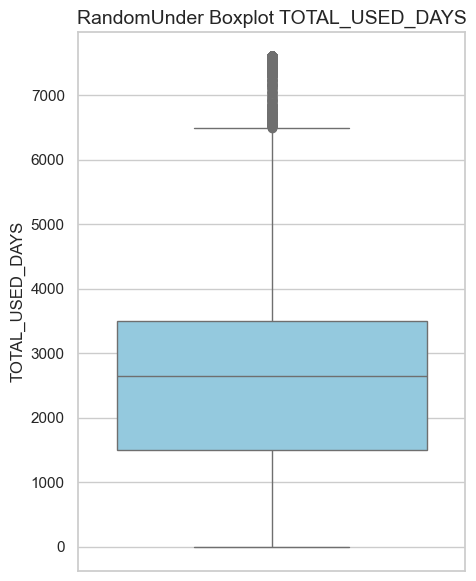

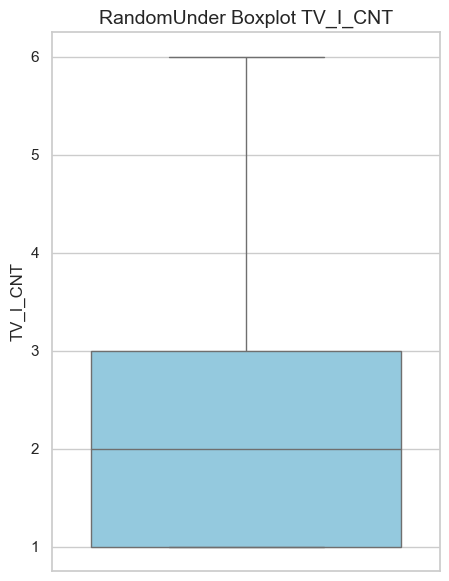

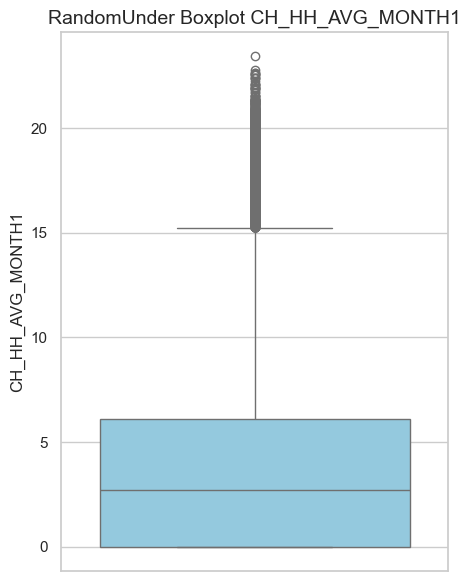

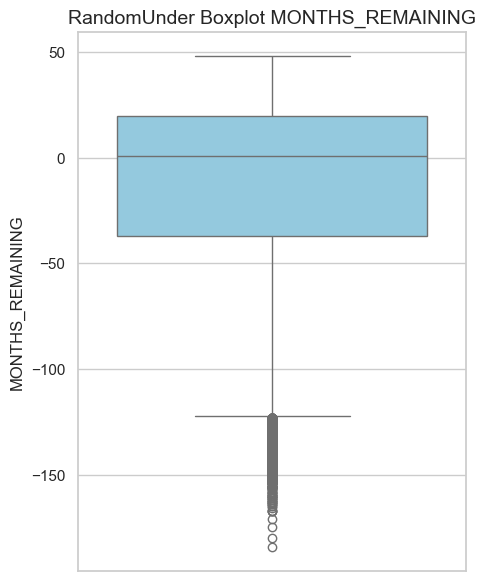

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# dfÏóêÏÑú Ïó∞ÏÜçÌòï(ÏàòÏπòÌòï) Î≥ÄÏàò Ï∞æÍ∏∞
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

# Í∞Å Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌï¥ boxplot
for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=train[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'RandomUnder Boxplot {col}', fontsize=14)

    plt.show()

In [49]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplotÏúºÎ°ú ÌôïÏù∏Ìïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [50]:
display(train, test)

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  AGMT_KIND_NM  \
0                   0.50          0.00         1.00          0.83   
1                   0.75          0.50         0.00          0.33   
2                   0.75          0.00         0.00          0.00   
3                   0.50          0.00         0.00          0.83   
4                   0.00          0.00         0.00          0.83   
...                  ...           ...          ...           ...   
211407              0.50          0.00         1.00          0.83   
211408              0.00          0.00         0.75          0.00   
211409              1.00          0.50         1.00          0.00   
211410              0.75          0.00         0.00          0.00   
211411              0.00          0.50         0.00          0.00   

        STB_RES_1M_YN  PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  \
0                0.00               0.00              0.11         0.40   
1                0.00               0.00              0.44         0.60   
2                0.00               0.00              0.00         0.70   
3                0.00               0.00              0.44         0.10   
4                0.00               0.00              0.11         0.00   
...               ...                ...               ...          ...   
211407           1.00               0.00              0.44         0.00   
211408           1.00               0.00              0.11         0.00   
211409           1.00               0.00              1.00         0.00   
211410           0.00               0.00              1.00         0.00   
211411           0.00               0.00              0.11         0.00   

        AGMT_END_SEG  TOTAL_USED_DAYS  BUNDLE_YN  TV_I_CNT  \
0               0.08             0.09       1.00      0.40   
1               0.62            -0.16       1.00      0.20   
2               0.08             0.22       0.00      0.20   
3               0.08             0.58       1.00      0.20   
4               0.08             0.64       1.00      0.40   
...              ...              ...        ...       ...   
211407          0.08             0.54       1.00      0.20   
211408          0.08            -1.07       1.00      0.20   
211409          0.08            -1.32       1.00      0.20   
211410          0.08            -1.21       0.00      0.00   
211411          0.08            -1.14       1.00      0.20   

        CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  VOC_STOP_CANCEL_MONTH1_YN  \
0                      0.80                 0.00                       0.00   
1                      0.80                 0.00                       0.00   
2                      0.80                 0.00                       0.00   
3                      0.80                 0.00                       0.00   
4                      0.40                 1.00                       0.00   
...                     ...                  ...                        ...   
211407                 0.80                 0.00                       0.00   
211408                 0.20                 0.00                       0.00   
211409                 0.80                 1.00                       0.00   
211410                 1.00                 0.00                       0.00   
211411                 0.80                 0.00                       0.00   

        AGE_GRP10  CH_HH_AVG_MONTH1  CONTENT_USE_YN  CH_LAST_DAYS_FE  \
0            0.50              0.52            0.00             1.00   
1            0.12              1.27            1.00             1.00   
2            0.50              1.24            0.00             1.00   
3            0.38             -0.10            0.00             1.00   
4            0.88             -0.39            0.00             1.00   
...           ...               ...             ...              ...   
211407       0.50             -0.13            0.00             1.00   
211408  

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  AGMT_KIND_NM  \
0                    0.25          0.00         0.75          0.83   
1                    0.25          0.00         1.00          0.83   
2                    0.50          0.00         0.00          0.83   
3                    0.50          0.00         0.75          0.00   
4                    0.50          0.00         1.00          0.00   
...                   ...           ...          ...           ...   
1945587              0.50          0.00         0.00          0.83   
1945588              0.50          0.00         0.75          0.00   
1945589              0.00          0.00         0.75          0.33   
1945590              0.50          0.50         0.00          0.83   
1945591              0.50          0.00         0.00          0.00   

         STB_RES_1M_YN  PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  \
0                 0.00               0.00              0.00         0.30   
1                 0.00               0.00              0.00         0.80   
2                 0.00               0.00              0.44         0.10   
3                 0.00               0.00              0.44         0.10   
4                 0.00               0.33              1.00         0.00   
...                ...                ...               ...          ...   
1945587           0.00               0.00              1.00         0.00   
1945588           0.00               0.00              0.11         0.10   
1945589           0.00               0.00              0.44         0.00   
1945590           0.00               0.00              0.00         0.30   
1945591           0.00               0.00              1.00         0.00   

         AGMT_END_SEG  TOTAL_USED_DAYS  BUNDLE_YN  TV_I_CNT  \
0                0.08            -0.82       1.00      0.40   
1                0.46             0.88       1.00      0.20   
2                0.08            -0.00       1.00      1.00   
3                1.00            -0.33       0.00      0.40   
4                0.62             0.67       1.00      0.60   
...               ...              ...        ...       ...   
1945587          0.62             0.48       0.00      0.20   
1945588          0.62            -0.18       1.00      0.40   
1945589          0.62             0.66       0.00      0.20   
1945590          0.08            -0.55       1.00      0.20   
1945591          0.62            -0.11       0.00      0.00   

         CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  VOC_STOP_CANCEL_MONTH1_YN  \
0                       0.80                 0.00                       0.00   
1                       0.80                 0.00                       0.00   
2                       0.80                 0.00                       0.00   
3                       0.80                 0.00                       0.00   
4                       0.80                 1.00                       0.00   
...                      ...                  ...                        ...   
1945587                 0.20                 0.00                       0.00   
1945588                 0.80                 0.00                       0.00   
1945589                 0.80                 0.00                       0.00   
1945590                 0.80                 0.00                       0.00   
1945591                 0.20                 0.00                       0.00   

         AGE_GRP10  CH_HH_AVG_MONTH1  CONTENT_USE_YN  CH_LAST_DAYS_FE  \
0             0.50              0.58            0.00             1.00   
1             0.38              2.08            0.00             1.00   
2             0.50             -0.20            0.00             1.00   
3             0.50             -0.09            0.00             1.00   
4             0.38             -0.18            0.00             1.00   
...            ...               ...             ...              ...   
1945587       0.38        

In [51]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
#
model = LogisticRegression(solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Test Accuracy: 0.78

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1932416
           1       0.02      0.70      0.04     13176

    accuracy                           0.78   1945592
   macro avg       0.51      0.74      0.46   1945592
weighted avg       0.99      0.78      0.87   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1512972  419444]
 [   4003    9173]]


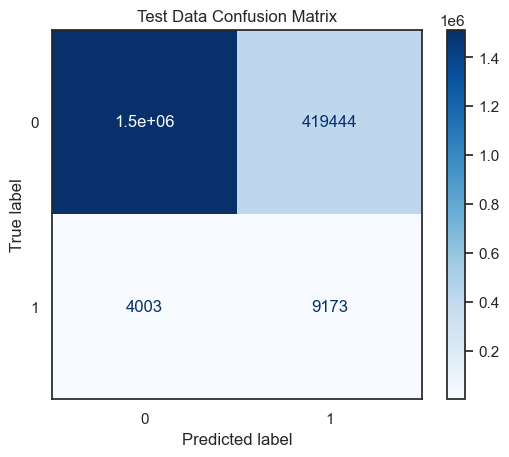

Test AUC-ROC: 0.81


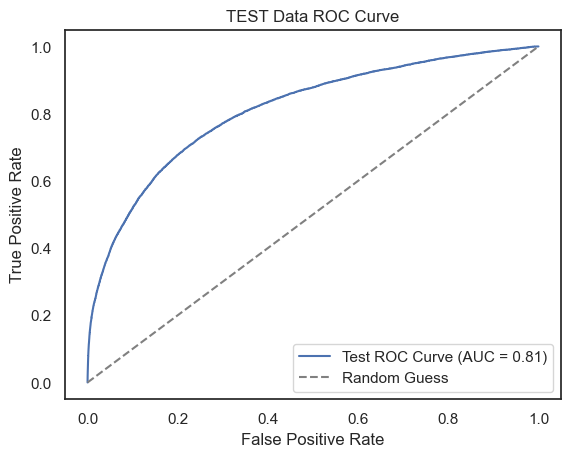

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

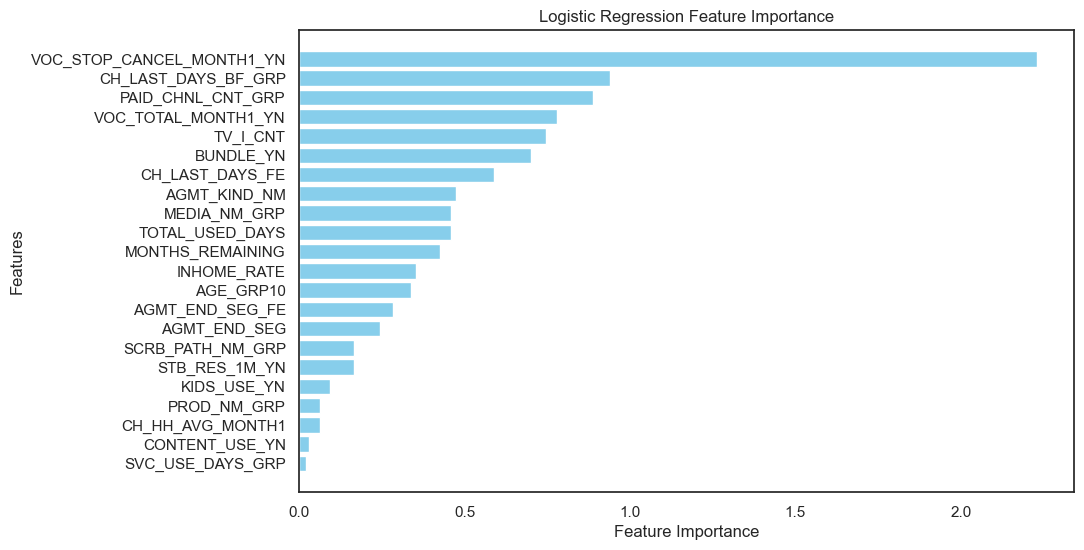

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Feature Importance Ï∂îÏ∂ú (Ï†àÎåìÍ∞í ÏÇ¨Ïö©)
feature_importance = np.abs(model.coef_[0])

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### 2. ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [55]:
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏
rf_model = RandomForestClassifier(
    n_estimators=100,  # Ìä∏Î¶¨ Í∞úÏàò
    random_state=42
)

# Î™®Îç∏ ÌïôÏäµ
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Test Accuracy: 0.81

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.81      0.89   1932416
           1       0.02      0.71      0.05     13176

    accuracy                           0.81   1945592
   macro avg       0.51      0.76      0.47   1945592
weighted avg       0.99      0.81      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1558446  373970]
 [   3860    9316]]


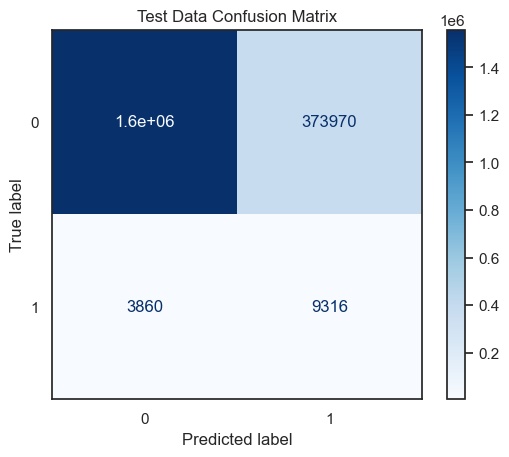

Test AUC-ROC: 0.83


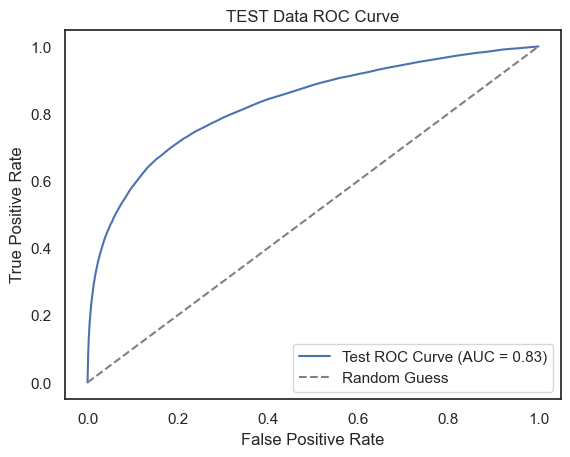

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = rf_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=rf_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = rf_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

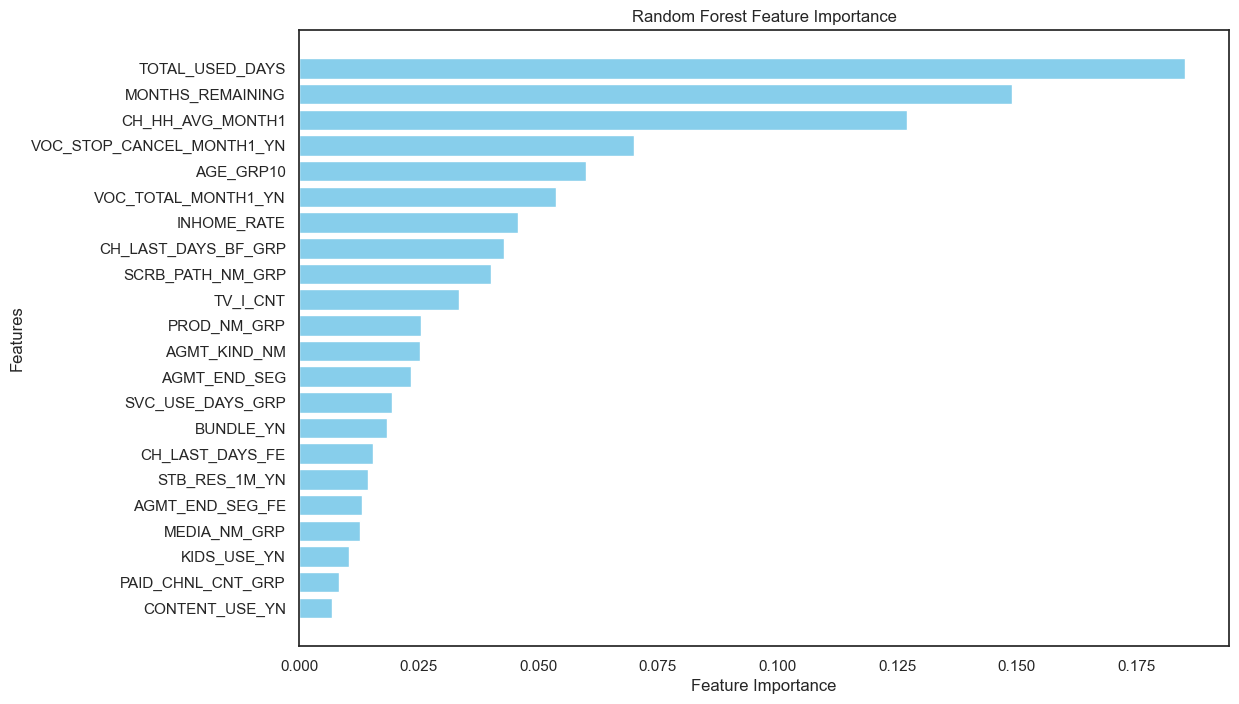

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()

#### 3. XGB ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [58]:
from xgboost import XGBClassifier

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# XGBoost Î™®Îç∏ ÏÉùÏÑ±
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)

# Î™®Îç∏ ÌïôÏäµ
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Test Accuracy: 0.82

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1932416
           1       0.03      0.73      0.05     13176

    accuracy                           0.82   1945592
   macro avg       0.51      0.78      0.47   1945592
weighted avg       0.99      0.82      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1579253  353163]
 [   3520    9656]]


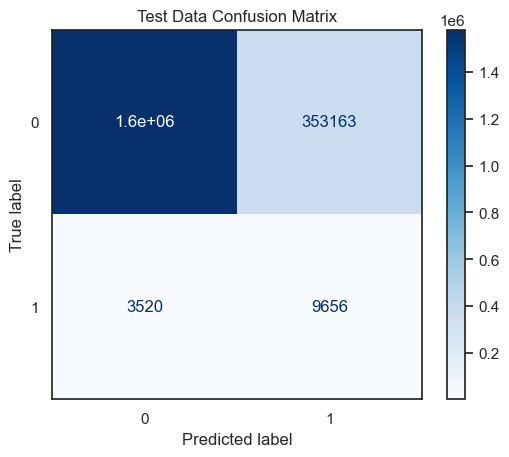

Test AUC-ROC: 0.85


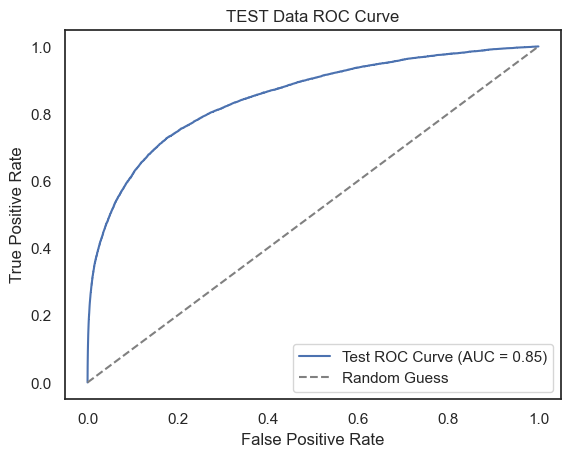

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = xgb_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=xgb_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = xgb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

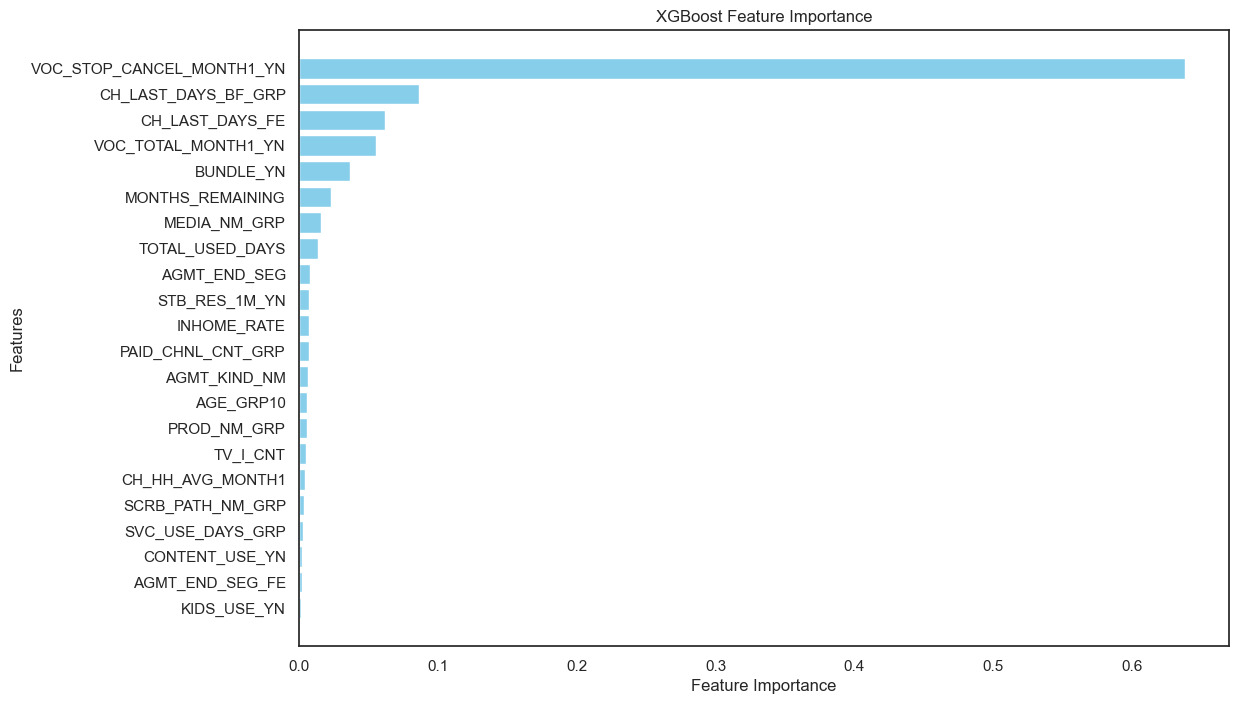

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# XGBoost Feature Importance Ï∂îÏ∂ú
feature_importance = xgb_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 4. LGBM ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [61]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=42)

Test Accuracy: 0.82

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1932416
           1       0.03      0.73      0.05     13176

    accuracy                           0.82   1945592
   macro avg       0.51      0.77      0.48   1945592
weighted avg       0.99      0.82      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1581716  350700]
 [   3547    9629]]


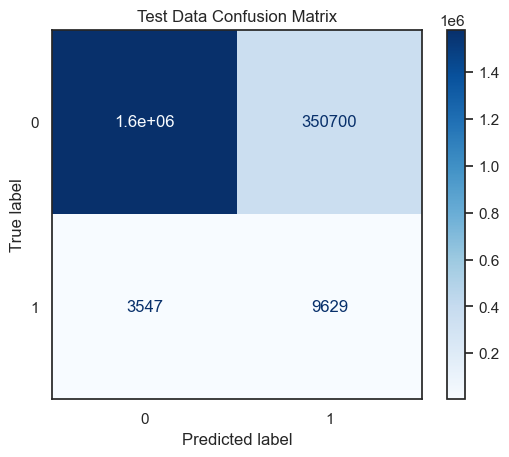

Test AUC-ROC: 0.85


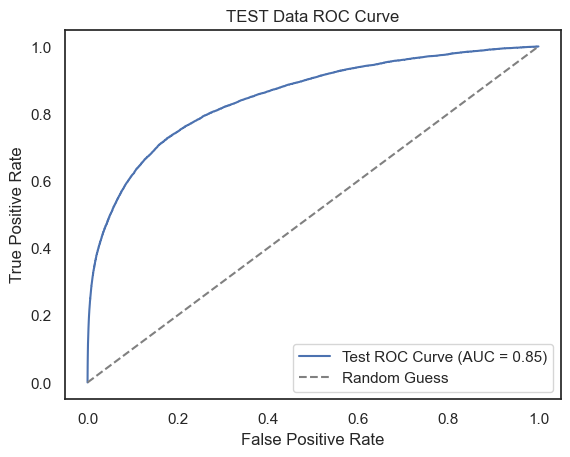

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = lgbm_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

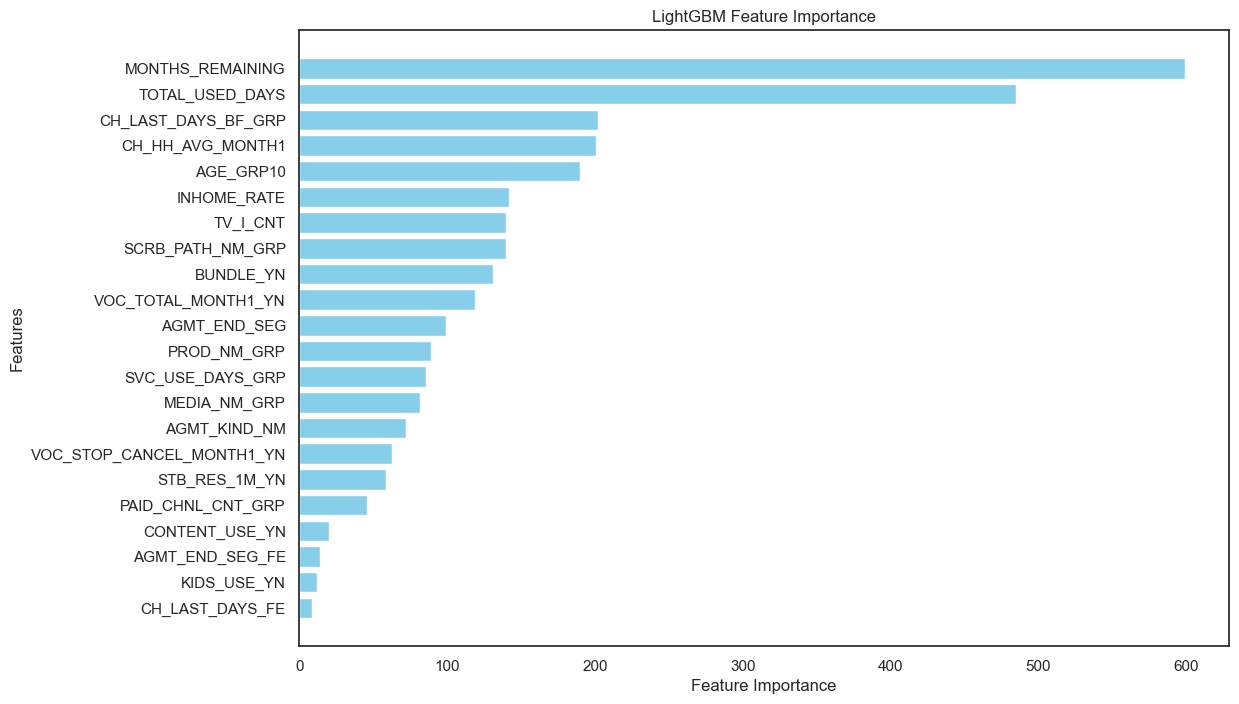

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 5. CatBoost ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ

In [64]:
from catboost import CatBoostClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# Í∏∞Î≥∏Í∞íÏùÑ ÏÇ¨Ïö©Ìïú CatBoost Î™®Îç∏ ÏÉùÏÑ±
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    random_seed=42
)

# Î™®Îç∏ ÌïôÏäµ
cat_model.fit(X_train, y_train)

0:	learn: 0.6797031	total: 171ms	remaining: 2m 51s
1:	learn: 0.6671393	total: 210ms	remaining: 1m 44s
2:	learn: 0.6554904	total: 243ms	remaining: 1m 20s
3:	learn: 0.6450984	total: 270ms	remaining: 1m 7s
4:	learn: 0.6353696	total: 293ms	remaining: 58.2s
5:	learn: 0.6262875	total: 315ms	remaining: 52.2s
6:	learn: 0.6179714	total: 340ms	remaining: 48.2s
7:	learn: 0.6102105	total: 363ms	remaining: 45s
8:	learn: 0.6031074	total: 388ms	remaining: 42.7s
9:	learn: 0.5969630	total: 456ms	remaining: 45.1s
10:	learn: 0.5912653	total: 495ms	remaining: 44.5s
11:	learn: 0.5855908	total: 528ms	remaining: 43.5s
12:	learn: 0.5804210	total: 553ms	remaining: 42s
13:	learn: 0.5754965	total: 580ms	remaining: 40.8s
14:	learn: 0.5710877	total: 607ms	remaining: 39.9s
15:	learn: 0.5671514	total: 636ms	remaining: 39.1s
16:	learn: 0.5632695	total: 658ms	remaining: 38.1s
17:	learn: 0.5601500	total: 686ms	remaining: 37.4s
18:	learn: 0.5567110	total: 719ms	remaining: 37.1s
19:	learn: 0.5538226	total: 752ms	remainin

Test Accuracy: 0.82

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1932416
           1       0.03      0.73      0.05     13176

    accuracy                           0.82   1945592
   macro avg       0.51      0.77      0.47   1945592
weighted avg       0.99      0.82      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1578968  353448]
 [   3520    9656]]


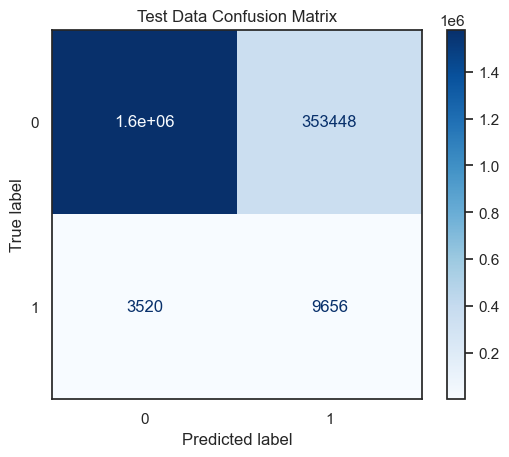

Test AUC-ROC: 0.85


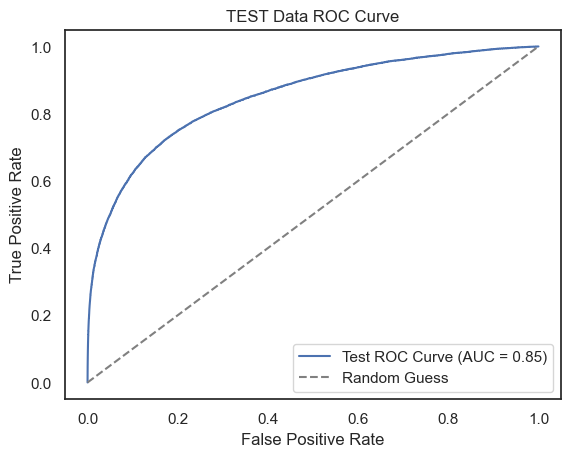

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = cat_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=cat_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = cat_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

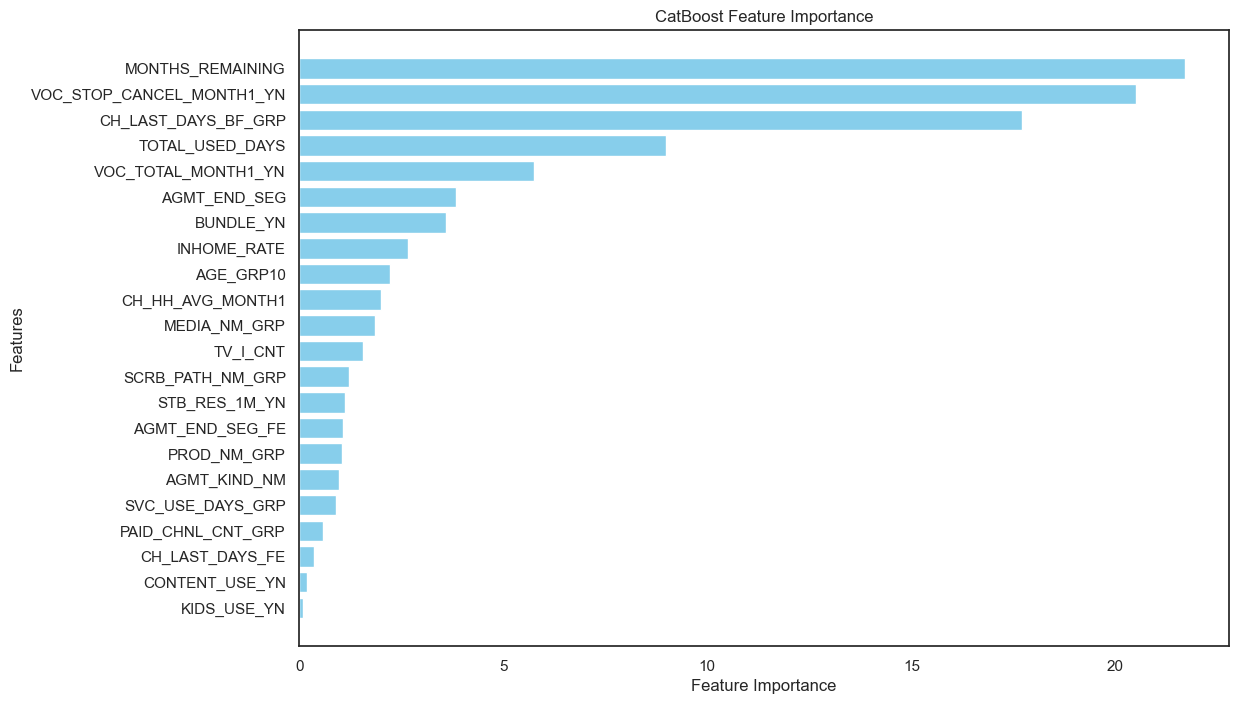

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# CatBoost Feature Importance Ï∂îÏ∂ú
feature_importance = cat_model.get_feature_importance()

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()


---

### Í∞ÄÏ§ëÏπòÎ°ú ÏßÑÌñâ
1. Î°úÏßÄÏä§Ìã±
2. LGBM

#### 1. LR Í∞ÄÏ§ëÏπò

In [67]:
df = df_real.filter(items=['sha2_hash','SVC_USE_DAYS_GRP','MEDIA_NM_GRP','PROD_NM_GRP','AGMT_KIND_NM','STB_RES_1M_YN',
                 'PAID_CHNL_CNT_GRP','SCRB_PATH_NM_GRP','INHOME_RATE','AGMT_END_SEG','TOTAL_USED_DAYS','BUNDLE_YN',
                 'TV_I_CNT','CH_LAST_DAYS_BF_GRP','VOC_TOTAL_MONTH1_YN','VOC_STOP_CANCEL_MONTH1_YN','AGE_GRP10',
                 'CH_HH_AVG_MONTH1','CONTENT_USE_YN','CH_LAST_DAYS_FE','AGMT_END_SEG_FE','KIDS_USE_YN','MONTHS_REMAINING',
                 'p_mt','churn'])

In [8]:
train = df[df['p_mt'].isin([2,3,4,5,6,7,8,9])]
test = df[df['p_mt'] == 11]

In [9]:
train['INHOME_RATE'] = train['INHOME_RATE'].astype(str)
test['INHOME_RATE'] = test['INHOME_RATE'].astype(str)
print(train['INHOME_RATE'].dtypes)
print(test['INHOME_RATE'].dtypes)

object
object


In [10]:
train = train.drop(columns=['sha2_hash','p_mt'])
test = test.drop(columns=['sha2_hash','p_mt'])

In [11]:
from sklearn.preprocessing import LabelEncoder

train_and_test = pd.concat([train, test])

categorical_cols = train_and_test.select_dtypes(include=['object']).columns

label_encoders = {}

for col in categorical_cols:
  le = LabelEncoder()
  train_and_test[col] = le.fit_transform(train_and_test[col])
  label_encoders[col] = le

# Ïù∏ÏΩîÎî© ÌõÑ, Îã§Ïãú trainÍ≥º testÎ°ú Î∂ÑÎ¶¨

train = train_and_test.iloc[:len(train)].reset_index(drop=True)
test = train_and_test.iloc[len(train):].reset_index(drop=True)

print("Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ")

Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© ÎÅù! üòÅ


In [12]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# boxplotÏúºÎ°ú ÌôïÏù∏Ìïú robust Ïä§ÏºÄÏùºÎßÅ Ïª¨ÎüºÎì§
robust_columns = ['TOTAL_USED_DAYS', 'CH_HH_AVG_MONTH1', 'MONTHS_REMAINING']  # RobustScalerÎ•º Ï†ÅÏö©Ìï† Ïª¨Îüº
minmax_columns = [col for col in train.columns if col not in robust_columns + ['churn']]  # ÎÇòÎ®∏ÏßÄ Ïª¨Îüº

# Ïä§ÏºÄÏùºÎü¨ ÏÉùÏÑ±
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# RobustScaler Ï†ÅÏö©
train[robust_columns] = robust_scaler.fit_transform(train[robust_columns])
test[robust_columns] = robust_scaler.transform(test[robust_columns])

# MinMaxScaler Ï†ÅÏö©
train[minmax_columns] = minmax_scaler.fit_transform(train[minmax_columns])
test[minmax_columns] = minmax_scaler.transform(test[minmax_columns])

# Í≤∞Í≥º ÌôïÏù∏
print("robust, minmax ÎÅù")

robust, minmax ÎÅù


In [13]:
display(train, test)

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  AGMT_KIND_NM  \
0                     0.00          0.00         0.80          0.00   
1                     0.25          0.00         0.80          0.00   
2                     0.25          0.00         0.80          0.00   
3                     0.25          0.00         0.80          0.00   
4                     0.25          0.00         0.80          0.00   
...                    ...           ...          ...           ...   
15647031              0.50          0.00         0.20          0.00   
15647032              0.50          0.00         0.20          0.00   
15647033              0.50          0.00         0.20          0.00   
15647034              0.50          0.00         0.20          0.00   
15647035              0.50          0.00         0.20          0.00   

          STB_RES_1M_YN  PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  \
0                  0.00               0.00              0.00         0.10   
1                  1.00               0.00              0.00         0.00   
2                  0.00               0.00              0.00         0.10   
3                  0.00               0.00              0.00         0.10   
4                  0.00               0.00              0.00         0.00   
...                 ...                ...               ...          ...   
15647031           0.00               0.00              1.00         0.10   
15647032           0.00               0.00              1.00         0.10   
15647033           0.00               0.00              1.00         0.10   
15647034           0.00               0.00              1.00         0.10   
15647035           0.00               0.00              1.00         0.10   

          AGMT_END_SEG  TOTAL_USED_DAYS  BUNDLE_YN  TV_I_CNT  \
0                 0.08            -1.41       1.00      0.40   
1                 0.54            -1.39       1.00      0.40   
2                 0.54            -1.37       1.00      0.40   
3                 0.54            -1.35       1.00      0.40   
4                 0.46            -1.33       1.00      0.40   
...                ...              ...        ...       ...   
15647031          0.62            -0.42       0.00      0.00   
15647032          0.62            -0.40       0.00      0.00   
15647033          0.62            -0.38       0.00      0.00   
15647034          0.62            -0.36       0.00      0.00   
15647035          0.62            -0.34       0.00      0.00   

          CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  VOC_STOP_CANCEL_MONTH1_YN  \
0                        0.20                 0.00                       0.00   
1                        0.80                 1.00                       0.00   
2                        0.40                 0.00                       0.00   
3                        0.60                 0.00                       0.00   
4                        0.80                 0.00                       0.00   
...                       ...                  ...                        ...   
15647031                 0.80                 0.00                       0.00   
15647032                 0.80                 0.00                       0.00   
15647033                 0.80                 0.00                       0.00   
15647034                 0.80                 0.00                       0.00   
15647035                 0.80                 0.00                       0.00   

          AGE_GRP10  CH_HH_AVG_MONTH1  CONTENT_USE_YN  CH_LAST_DAYS_FE  \
0              0.56             -0.65            0.00             0.00   
1              0.56              0.50            0.00             1.00   
2              0.56              1.03            0.00             1.00   
3              0.56              0.37            0.00             1.00   
4              0.56              0.04            0.00             1.00   
...             ...               ...         

SVC_USE_DAYS_GRP  MEDIA_NM_GRP  PROD_NM_GRP  AGMT_KIND_NM  \
0                    0.25          0.00         0.80          0.83   
1                    0.25          0.00         1.00          0.83   
2                    0.50          0.00         0.20          0.83   
3                    0.50          0.00         0.80          0.00   
4                    0.50          0.00         1.00          0.00   
...                   ...           ...          ...           ...   
1945587              0.50          0.00         0.20          0.83   
1945588              0.50          0.00         0.80          0.00   
1945589              0.00          0.00         0.80          0.33   
1945590              0.50          0.50         0.20          0.83   
1945591              0.50          0.00         0.20          0.00   

         STB_RES_1M_YN  PAID_CHNL_CNT_GRP  SCRB_PATH_NM_GRP  INHOME_RATE  \
0                 0.00               0.00              0.00         0.30   
1                 0.00               0.00              0.00         0.80   
2                 0.00               0.00              0.44         0.10   
3                 0.00               0.00              0.44         0.10   
4                 0.00               0.33              1.00         0.00   
...                ...                ...               ...          ...   
1945587           0.00               0.00              1.00         0.00   
1945588           0.00               0.00              0.11         0.10   
1945589           0.00               0.00              0.44         0.00   
1945590           0.00               0.00              0.00         0.30   
1945591           0.00               0.00              1.00         0.00   

         AGMT_END_SEG  TOTAL_USED_DAYS  BUNDLE_YN  TV_I_CNT  \
0                0.08            -1.23       1.00      0.40   
1                0.46             1.00       1.00      0.20   
2                0.08            -0.16       1.00      1.00   
3                1.00            -0.58       0.00      0.40   
4                0.62             0.72       1.00      0.60   
...               ...              ...        ...       ...   
1945587          0.62             0.47       0.00      0.20   
1945588          0.62            -0.39       1.00      0.40   
1945589          0.62             0.70       0.00      0.20   
1945590          0.08            -0.87       1.00      0.20   
1945591          0.62            -0.30       0.00      0.00   

         CH_LAST_DAYS_BF_GRP  VOC_TOTAL_MONTH1_YN  VOC_STOP_CANCEL_MONTH1_YN  \
0                       0.80                 0.00                       0.00   
1                       0.80                 0.00                       0.00   
2                       0.80                 0.00                       0.00   
3                       0.80                 0.00                       0.00   
4                       0.80                 1.00                       0.00   
...                      ...                  ...                        ...   
1945587                 0.20                 0.00                       0.00   
1945588                 0.80                 0.00                       0.00   
1945589                 0.80                 0.00                       0.00   
1945590                 0.80                 0.00                       0.00   
1945591                 0.20                 0.00                       0.00   

         AGE_GRP10  CH_HH_AVG_MONTH1  CONTENT_USE_YN  CH_LAST_DAYS_FE  \
0             0.56              0.41            0.00             1.00   
1             0.44              1.97            0.00             1.00   
2             0.56             -0.40            0.00             1.00   
3             0.56             -0.28            0.00             1.00   
4             0.44             -0.37            0.00             1.00   
...            ...               ...             ...              ...   
1945587       0.44        

In [14]:
# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏßÑÌñâ

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train = train.drop(columns=['churn'])
y_train = train['churn']

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÏÉùÏÑ±
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Î™®Îç∏ ÌïôÏäµ
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

Test Accuracy: 0.78

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.78      0.88   1932416
           1       0.02      0.70      0.04     13176

    accuracy                           0.78   1945592
   macro avg       0.51      0.74      0.46   1945592
weighted avg       0.99      0.78      0.87   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1511491  420925]
 [   3995    9181]]


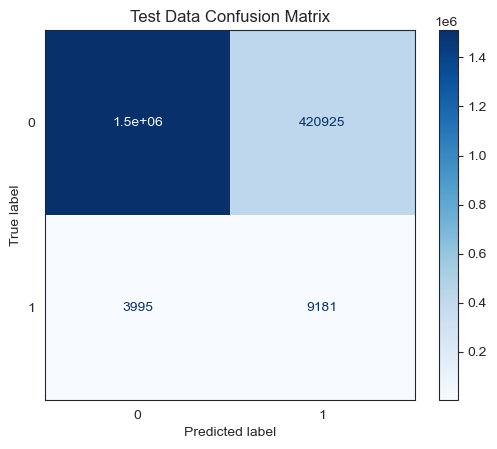

Test AUC-ROC: 0.81


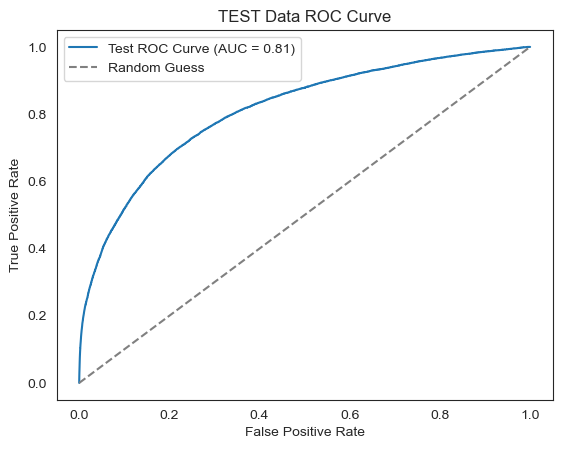

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

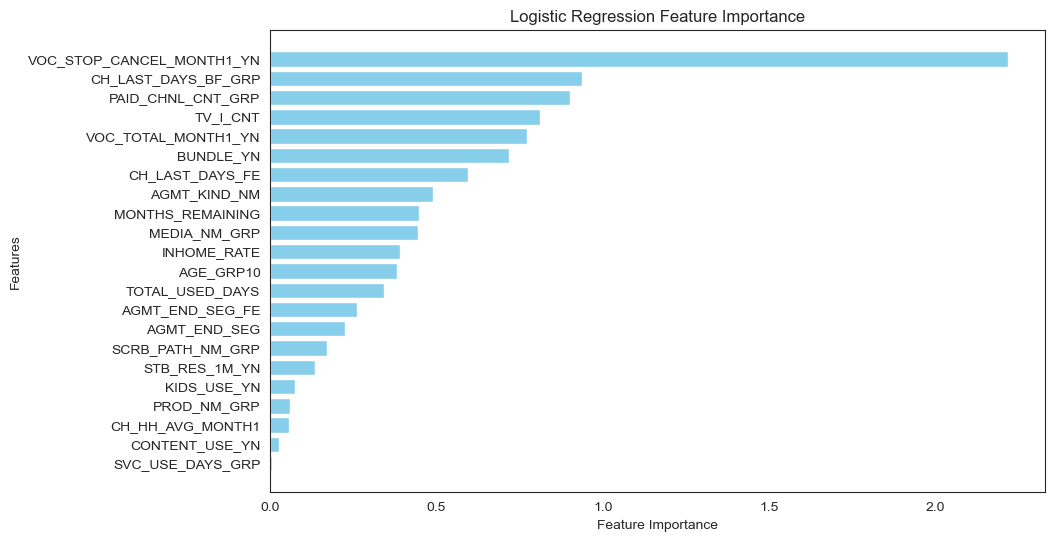

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = np.abs(model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Logistic Regression Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### 2. LGBM Í∞ÄÏ§ëÏπò

In [18]:
from lightgbm import LGBMClassifier

# ÎèÖÎ¶Ω Î≥ÄÏàò & Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
X_train = train.drop(columns=['churn'])  # ÎèÖÎ¶Ω Î≥ÄÏàò
y_train = train['churn']  # Ï¢ÖÏÜç Î≥ÄÏàò

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=-1,
    learning_rate=0.1,
    class_weight='balanced',  # ÌÅ¥ÎûòÏä§ Í∞ÄÏ§ëÏπò Ï†ÅÏö©
    random_state=42 
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_model.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', random_state=42)

Test Accuracy: 0.82

Classification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1932416
           1       0.03      0.73      0.05     13176

    accuracy                           0.82   1945592
   macro avg       0.51      0.78      0.48   1945592
weighted avg       0.99      0.82      0.89   1945592


Confusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):
[[1584487  347929]
 [   3541    9635]]


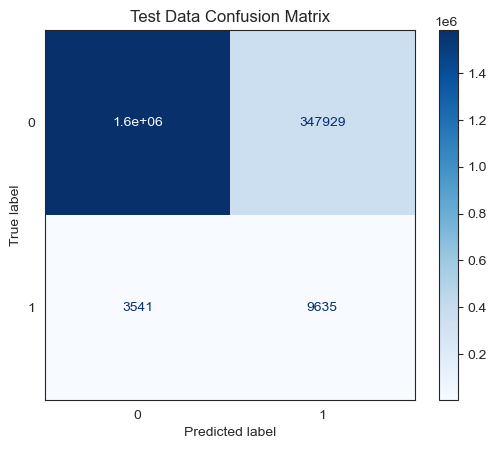

Test AUC-ROC: 0.85


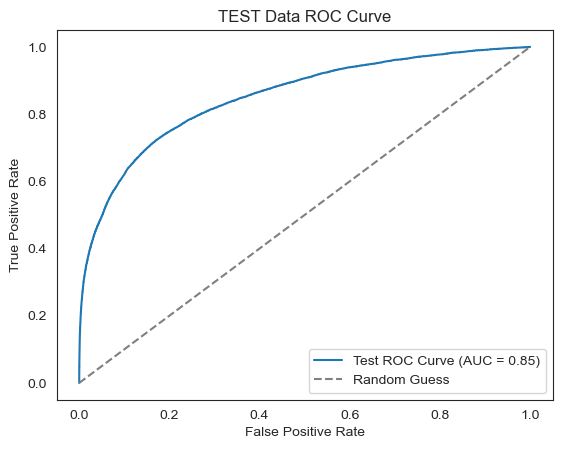

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay  # ConfusionMatrixDisplay ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
X_test = test.drop(columns=['churn'])
y_test = test['churn']

# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ (Test) ÌèâÍ∞Ä
# -----------------------------------------------------------
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞(test) ÏòàÏ∏°
test_predictions = lgbm_model.predict(X_test)

# Ï†ïÌôïÎèÑ ÌôïÏù∏
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification Î¶¨Ìè¨Ìä∏
print("\nClassification Report (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(classification_report(y_test, test_predictions))

# Confusion Matrix (ÌòºÎèôÌñâÎ†¨)
print("\nConfusion Matrix (ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞):")
print(confusion_matrix(y_test, test_predictions))
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_predictions), display_labels=lgbm_model.classes_)

plt.figure()
disp_test.plot(cmap="Blues", ax=plt.gca())
plt.grid(False)
plt.title("Test Data Confusion Matrix")
plt.show()

# AUC-ROC Í≥ÑÏÇ∞
test_probabilities = lgbm_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, test_probabilities)
print(f"Test AUC-ROC: {test_auc:.2f}")

# ROC Curve ÏãúÍ∞ÅÌôî
fpr_val, tpr_val, thresholds_val = roc_curve(y_test, test_probabilities)
plt.figure()
plt.plot(fpr_val, tpr_val, label=f"Test ROC Curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("TEST Data ROC Curve")
plt.legend()
plt.grid(False)
plt.show()

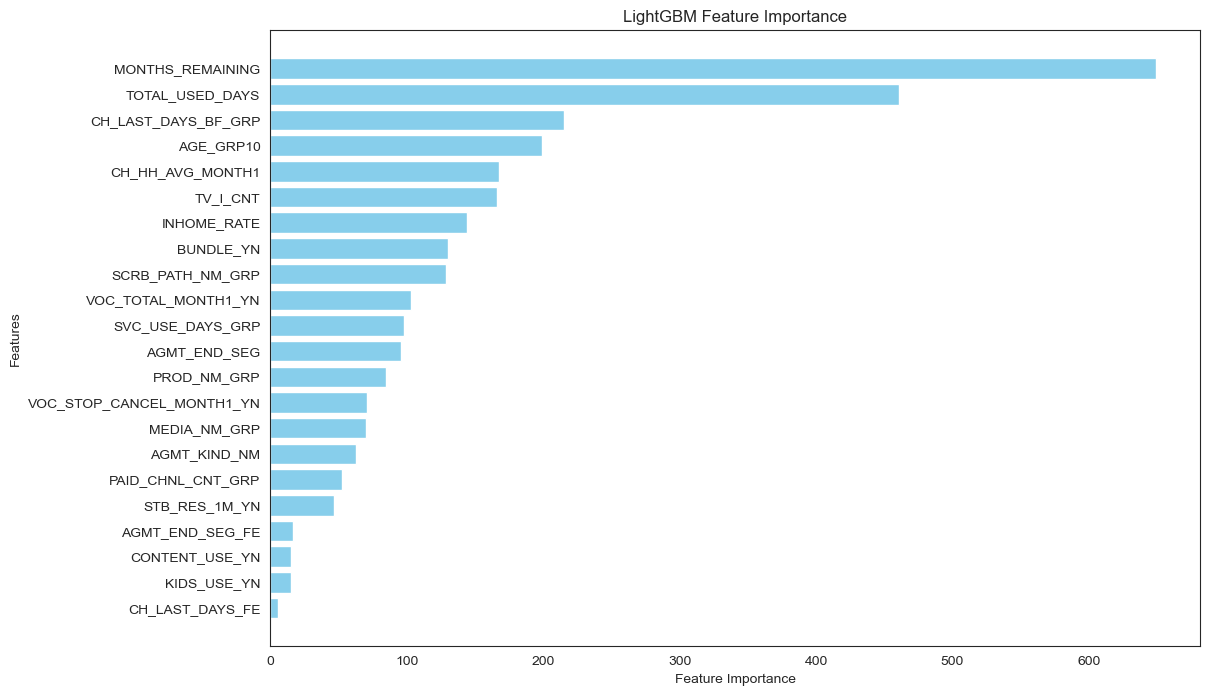

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# LightGBM Feature Importance Ï∂îÏ∂ú
feature_importance = lgbm_model.feature_importances_

# DataFrame Î≥ÄÌôò Î∞è Ï†ïÎ†¨
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Feature Importance ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.gca().invert_yaxis()
plt.show()

---

#### üìå ÌåÄ ÌîÑÎ°úÏ†ùÌä∏ Ï£ºÏ†úÏóê ÏïåÎßûÏùÄ Î™®Îç∏ ÏÑ†ÌÉù Í∏∞Ï§Ä

##### 1Ô∏è. FN(False Negative) Í∞êÏÜå  
- Ïã§Ï†ú Ìï¥ÏßÄ Í≥†Í∞ù(1)ÏùÑ Î™®Îç∏Ïù¥ Ìï¥ÏßÄÍ∞Ä ÏïÑÎãàÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤ΩÏö∞(FN)
- **FNÏù¥ ÎÜíÏùÑÏàòÎ°ù, Ìï¥ÏßÄÌï† Í≥†Í∞ùÏùÑ Ï†úÎåÄÎ°ú ÏòàÏ∏°ÌïòÏßÄ Î™ªÌïú Í≤É**Ïù¥ÎØÄÎ°ú **ÏµúÎåÄÌïú Ï§ÑÏó¨Ïïº Ìï®**  

##### 2Ô∏è. TP(True Positive) Ï¶ùÍ∞Ä  
- Ïã§Ï†ú Ìï¥ÏßÄ Í≥†Í∞ù(1)ÏùÑ Î™®Îç∏Ïù¥ Ïò¨Î∞îÎ•¥Í≤å Ìï¥ÏßÄÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤ΩÏö∞(TP) 
- **TP Í∞íÏùÑ ÎÜíÏó¨Ïïº Ìï¥ÏßÄÌï† Í≥†Í∞ùÏùÑ Ï†ïÌôïÌûà Ï∞æÏïÑÎÇº Ïàò ÏûàÏùå**

##### 3Ô∏è. FP(False Positive) ÏµúÏÜåÌôî  
- Ïã§Ï†ú Ìï¥ÏßÄÍ∞Ä ÏïÑÎãå Í≥†Í∞ù(0)ÏùÑ Î™®Îç∏Ïù¥ Ìï¥ÏßÄÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤ΩÏö∞(FP)
- FPÎäî Îã®ÏàúÌïú Í≤ΩÍ≥†Î°ú ÎÅùÎÇ† Ïàò ÏûàÏúºÎØÄÎ°ú ÏôÑÏ†ÑÌûà ÏóÜÏï†Ïïº Ìï† ÌïÑÏöîÎäî ÏóÜÏßÄÎßå, **Í∞ÄÎä•Ìïú Ï§ÑÏù¥Îäî Í≤ÉÏù¥ Ï¢ãÏùå**


#### üìå Í≤∞Î°†  
‚úÖ **FN(Ïã§Ï†ú Ìï¥ÏßÄÎ•º ÎÜìÏπú Í≤ΩÏö∞)Î•º Ï§ÑÏù¥Í≥†, TP(Ï†ïÌôïÌïú Ìï¥ÏßÄ ÏòàÏ∏°)Î•º ÏµúÎåÄÌïú ÎÜíÏù¥Îäî Î™®Îç∏Ïù¥ Í∞ÄÏû• Ï†ÅÌï©Ìï®**<BR>
‚úÖ **FP(ÏûòÎ™ªÎêú Ìï¥ÏßÄ ÏòàÏ∏°)Îäî Ïñ¥Îäê Ï†ïÎèÑ Í∞êÏàòÌï† Ïàò ÏûàÏßÄÎßå, ÎÑàÎ¨¥ ÎßéÏúºÎ©¥ Í≥†Í∞ù Í≤ΩÌóòÏóê Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏùå**<BR>
‚úÖ **Îî∞ÎùºÏÑú, Recall(Ïû¨ÌòÑÏú®)Í≥º Precision(Ï†ïÎ∞ÄÎèÑ) Í∑†ÌòïÏùÑ Í≥†Î†§ÌïòÏó¨ ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌï¥Ïïº Ìï®**.

Ìï¥Îãπ Î™®Îç∏ ÏÑ†Ï†ï Í∏∞Ï§ÄÏúºÎ°ú 1Ï∞® ÏÑ†Ï†ïÎêú FeatureÎì§Î°ú Î™®Îç∏ÏùÑ ÏßÑÌñâÌïú Í≤∞Í≥º, <br><br>
**XGB(ÎûúÎç§ Ïñ∏Îçî ÏÉòÌîåÎßÅ)**ÏóêÏÑú Ï†úÏùº Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï§¨Îã§.<BR><BR>

---

1Ï∞® ÏÑ†Ï†ïÎêú Ïª¨ÎüºÎì§ + Feature EngineeringÏùÑ ÌÜµÌïú ÌååÏÉùÎ≥ÄÏàòÎì§Î°ú Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÏòÄÍ≥†, <br><br>
Ïù¥ Ï§ëÏóêÏÑúÎèÑ Îòê ÏòÅÌñ•Î†•Ïù¥ ÎÜíÏùÄ Ïª¨ÎüºÎì§ÏùÑ ÏÑ†Ï†ïÌï¥ÏÑú 2Ï∞® ÏÑ†Ï†ïÎêú Ïª¨ÎüºÎì§Î°ú Î™®Îç∏ÎßÅÏùÑ Ìïú Î≤à Îçî ÏßÑÌñâÌï¥Î≥¥Í≤†Îã§.